<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNAnalisisSentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar el conjunto de datos IMDB
num_words = 10000  # Limitar el vocabulario a las 10,000 palabras más comunes
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Longitud máxima de las reseñas
maxlen = 100

# Rellenar o truncar las entradas para que tengan la misma longitud
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64, input_length=maxlen))
model.add(GlobalAveragePooling1D())  # Esta capa realiza el promedio de los embeddings, simulando una bolsa de palabras
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria para el análisis de sentimiento

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641057 (2.45 MB)
Trainable params: 641057 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/10
49/49 [==============================] - 2s 31ms/step - loss: 0.6794 - accuracy: 0.6588 - val_loss: 0.6560 - val_accuracy: 0.7201
Epoch 2/10
49/49 [==============================] - 1s 26ms/step - loss: 0.6051 - accuracy: 0.7766 - val_loss: 0.5530 - val_accuracy: 0.7942
Epoch 3/10
49/49 [==============================] - 1s 26ms/step - loss: 0.4811 - accuracy: 0.8311 - val_loss: 0.4441 - val_accuracy: 0.8247
Epoch 4/10
49/49 [==============================] - 1s 27ms/step - loss: 0.3806 - accuracy: 0.8581 - val_loss: 0.3829 - val_accuracy: 0.8377
Epoch 5/10
49/49 [==============================] - 1s 27ms/step - loss: 0.3216 - accuracy: 0.8757 - val_loss: 0.3568 - val_accuracy: 0.8456
Epoch 6/10
49/49 [==============================] - 1s 27ms/step - loss: 0.2841 - accuracy: 0.8897 - val_loss: 0.3412 - val_accuracy: 0.8520
Epoch 7/10
49/49 [==============================] - 2s 43ms/step - loss: 0.2571 - accuracy: 0.9024 - val_loss: 0.3364 - val_accuracy: 0.8510
Epoch 8/10
49

In [5]:
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

782/782 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8520
Test Loss: 0.34431296586990356, Test Accuracy: 0.8519600033760071


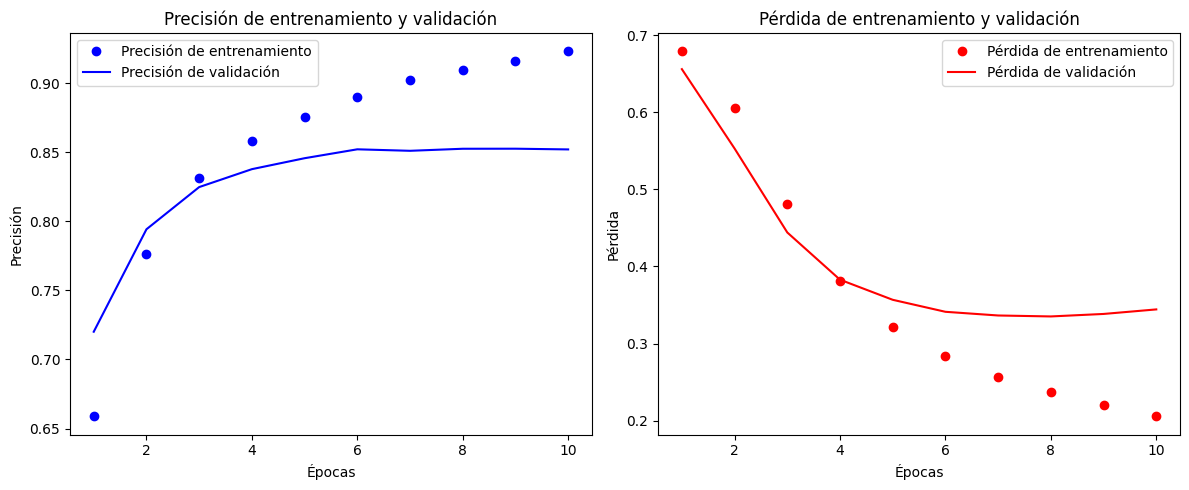

In [6]:
import matplotlib.pyplot as plt

# Extracción de los datos de precisión y pérdida del historial de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfica de la precisión de entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de la pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Cargar el diccionario de palabras de IMDB
word_index = imdb.get_word_index()

# Crear un diccionario que mapea los índices a palabras
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    # Decodificar una reseña
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Seleccionar un subconjunto de reseñas del conjunto de prueba
num_samples = 10  # Número de muestras para visualizar
indices = np.random.choice(np.arange(len(X_test)), size=num_samples, replace=False)

for index in indices:
    # Decodificar la reseña
    text = decode_review([word for word in X_test[index] if word > 2])
    # Predecir la sentimiento de la reseña
    prediction = model.predict(np.array([X_test[index]]))[0][0]
    # Predecir si la reseña es positiva o negativa
    predicted_sentiment = "Positivo" if prediction > 0.5 else "Negativo"
    # Etiqueta real
    actual_sentiment = "Positivo" if y_test[index] > 0.5 else "Negativo"
    # Mostrar los resultados
    print("\nReseña:", text)
    print("Sentimiento predicho:", predicted_sentiment)
    print("Sentimiento real:", actual_sentiment)


1/1 [==============================] - 0s 432ms/step

Reseña: and gives his patients excellent attention sir ronald burton richard greene an century english believes his two friends have been murdered by count von bruno stephen on his black forest estate arriving at von castle to evidence burton learns von unhappy wife paula and dr boris karloff the castle are virtual prisoners motives von bruno and jr a giant mute henchman discover the was responsible for their being captured and tortured you will definitely have to view this great classic karloff film to enjoy the ending
Sentimiento predicho: Positivo
Sentimiento real: Positivo
1/1 [==============================] - 0s 131ms/step

Reseña: as portrayed by this film follows a bunch of people whose lives are oddly linked to each with results beyond anyone's nightmares yes most characters are flawed in the way that only celluloid characters can completely annoying and frustrating to watch yet for some reason you wish for their luck to tu